- Name: William Hazen
- Student ID: 1009231225
- Department: MIE
- Program: M.Eng.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# fix random number seed
np.random.seed(1)


# 1.

### 1b)

In [2]:
# X is cont. U[2,10]
# theta = E[(X-5)^+]
# a^+ = Max(a,0) -> a^+ = 0 if a < 0
#                -> a^+ = a if a >= 0

ab_value_list = []  # initalize list
a = 2
b = 10
n = 100000  # 100k samples

for i in range(n):
    random_value = np.random.random()  # create random float between 0.0 & 1.0
    # scale by difference between a & b and shift by a
    ab_value = (b-a) * random_value + a
    # output is uniformed list of values between 2 & 10
    ab_value_list.append(ab_value)

theta = []
for x in ab_value_list:
    if x < 5:   # if x is less than 5 then a^+ = 0
        theta.append(0)
    else:       # if x >= 5 then a^+ = a
        theta.append((x-5))


In [3]:
average_theta_list = []
n = 0
for value in theta:  # loop through the values in theta
    n += 1
    if n == 1:
        average_theta_list.append(value)  # append the first value of theta
    else:
        average_theta_list.append(
            (1/n) * ((n-1)*average_theta_list[-1] + value))
        # running average = adding the new number to the old average and dividing by the total number of samples

theta_mean = np.mean(theta)  # mu of theta list
theta_std = np.std(theta)  # std of theta list


print("Average theta =", theta_mean)
# 95% confidence interval: alpha = mu +- 1.96 std/sqrt(n)
print('95% Confidence interval theta:', np.mean(theta),
      "+/-", 1.96*np.std(theta, ddof=1)/np.sqrt(n))

# 95% confidence interval: alpha = mu +- 1.96 std/sqrt(n)
alpha_neg = theta_mean - (1.96*theta_std)/np.sqrt(n)
alpha_plus = theta_mean + (1.96*theta_std)/np.sqrt(n)

print(" negative bound =", alpha_neg)
print(" Positive bound =", alpha_plus)


Average theta = 1.5613895874744266
95% Confidence interval theta: 1.5613895874744266 +/- 0.010318273591054833
 negative bound = 1.5510713654748687
 Positive bound = 1.5717078094739845


- 1a) theta = 1.5625

### 1c)

Text(0, 0.5, 'Running Average of theta')

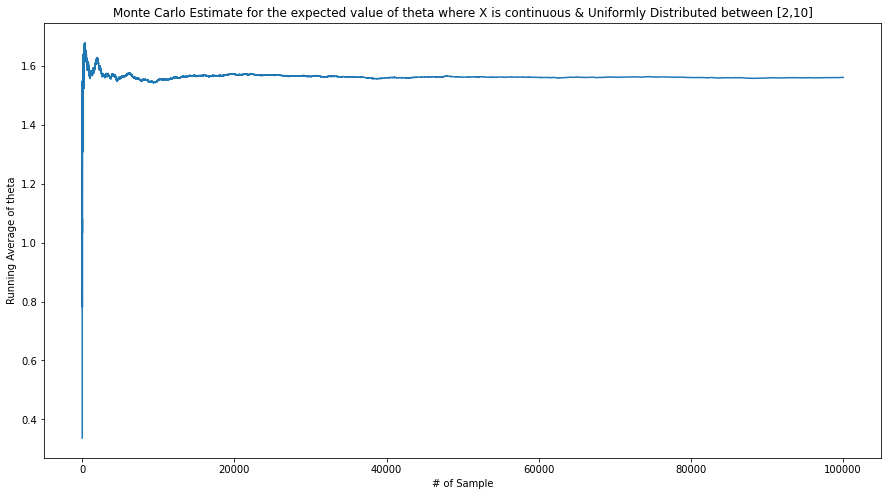

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(average_theta_list)
plt.title(
    "Monte Carlo Estimate for the expected value of theta where X is continuous & Uniformly Distributed between [2,10]")
plt.xlabel("# of Sample")
plt.ylabel("Running Average of theta")


# 2.

In [5]:
def Q2_TTF(T):
    # pesudo random
    np.random.seed(1)

    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    # lists to keep the event times and the states
    EventTimes = [0]
    States = [S]

    A_t = {}

    '''
    Logic: While the runtime is less than the value of T, clock is stored as the min value of either the repair or failure time. 
        If the repair value is less than the failure, we initalize the NextRepair to inf, however if S = 1 then we reset and schedule the next repair and failure time. 
        Similarly if the repair value is greater than the failure, we have the same condition but initalize NextFailure to inf.   
    '''

    while clock < T:  # changed while loop from S>0 to clock<T
        # advance the time till next event

        clock = min(NextRepair, NextFailure, T)  # Stops when clock = T

        if NextRepair < NextFailure:  # next event is completion of a repair
            S = S + 1
            if S == 2:
                # Can only be 1 or 2 thus NextRepair = inf if S!=1
                NextRepair = float('inf')
            elif S == 1:  # When S = 1, schedule next repair and failure
                NextRepair = clock + 2.5
                NextFailure = clock + np.ceil(6*np.random.random())

        else:  # next event is a failure
            S = S - 1
            if S == 0:
                # Can only be 1 or 0 thus NextFailure = inf if S!=1
                NextFailure = float('inf')
            elif S == 1:
                NextRepair = clock + 2.5
                NextFailure = clock + np.ceil(6*np.random.random())

        # save the time and state
        EventTimes.append(clock)
        States.append(S)
        last_clock = clock

        # Stores value of 1 when State = 1 at time t
        for idx, state in enumerate(States):
            if state == 2:
                A_t[EventTimes[idx]] = 1
            else:
                A_t[EventTimes[idx]] = 0

    # plot the sample path
    print('T =', int(T))
    print('Clock =', last_clock)
    print('Event Time length =', len(EventTimes))
    print('A_t =', sum(A_t.values())/len(EventTimes))
    plt.figure(figsize=(12, 5))
    plt.plot(EventTimes, States, drawstyle='steps-post')
    plt.title("TTF Simulation (Q2)")
    plt.xlabel("Event Times")
    plt.ylabel("States")
    plt.show()


### 2a)

T = 1000
Clock = 1000
Event Time length = 513
A_t = 0.32748538011695905


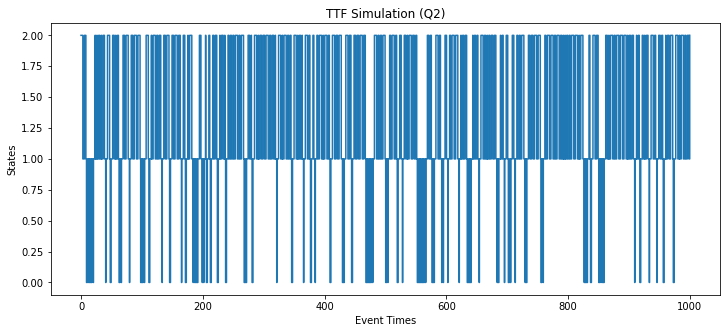

In [6]:
Q2_TTF(1000)


### 2b)

T = 2000
Clock = 2000
Event Time length = 1031
A_t = 0.3326867119301649


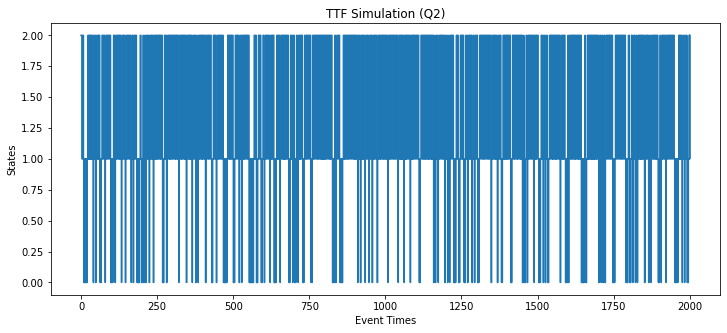

In [7]:
Q2_TTF(2000)


T = 4000
Clock = 4000.0
Event Time length = 2083
A_t = 0.33461353816610656


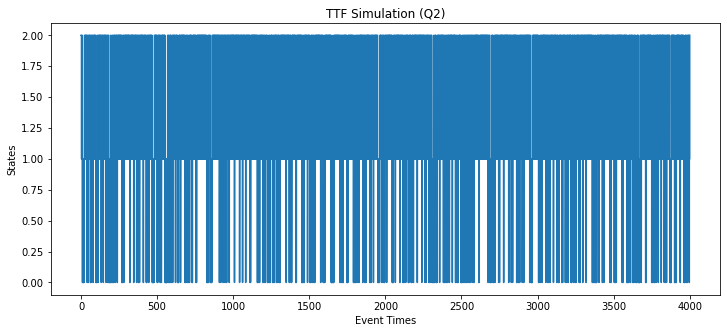

In [8]:
Q2_TTF(4000)


- T=1k: 0.32748538011695905
- T=3K: 0.3326867119301649
- T=4k: 0.33461353816610656

### Observations
- The fraction of the system being fully functional increases with time.

# 3.

In [9]:
def Q3_TTF(N):
    # Set number of replications
    Rep = 1000
    # Define lists to keep samples of the outputs across replications
    TTF_list = []

    # fix random number seed
    np.random.seed(1)

    for rep in range(0, Rep):
        clock = 0
        S = N
        Spare = N - 1  # number of spare components

        # initialize the time of events
        NextRepair = float('inf')
        NextFailure = np.ceil(6*np.random.random())
        EventTimes = [0]
        States = [S]
        
        '''
        Logic: For each replication, while S > 0, if the repair value is less than the failure, if S = N then there is no need to schedule a repair.
            However if not then the NextRepair will be scheduled if there is a spare avaliable.  
            If NextRepair >= NextFailure then the next failure is scheduled initally unless S = 0. 
            If S!=0 then we schedule the next repair [The reason why the NextFailure is outside is 
              because scheduling nextfailure does not depend on the spare components] 
            If the repair value is greater than the failure, we have the same condition but initalize NextFailure to inf.

            I accounted for each value of S in the event that Repair<Fail, 
            But In order to make sure only one repair can happen at a time 
            when Fail<Repair, a NextRepair is scheduled when S = N-1
        '''

        while S > 0:
            # advance the time till next event
            clock = min(NextRepair, NextFailure)

            if NextRepair < NextFailure:  # next event is completion of a repair
                S = S + 1
                Spare = Spare + 1 # Spare components increases with S
                
                if Spare == N: # Max spare components = N-1
                    Spare = N-1 
                
                if S == N: # Max components -> no repairs 
                    NextRepair = float('inf') 
                
                else:
                    if Spare > 0:  # If there are spare components available
                        Spare = Spare 
                        NextRepair = clock + 2.5

            else:  # next event is a failure
                S = S - 1
                NextFailure = clock + np.ceil(6*np.random.random())

                if S == 0:
                    NextFailure = float('inf')
                else:
                    if Spare > 0: 
                        Spare = Spare - 1
                        if S == (N-1):
                            NextRepair = clock + 2.5
            
            # save the time and state 
            EventTimes.append(clock) 
            States.append(S)

        # save the TTF and average # of func. components 
        TTF_list.append(clock) 
        
        #From Q1
        average_TTF_list = []
        n = 0
        for value in TTF_list:
            n += 1
            if n == 1: 
                average_TTF_list.append(value)
            else:
                average_TTF_list.append((1/n) * ((n-1)*average_TTF_list[-1] + value))

    print("For N = ", N)
    print('TTF List Length =', len(TTF_list))
    print('Estimated expected TTF:', np.mean(TTF_list)) 
    print('95% CI for TTF:', np.mean(TTF_list), "+/-", 1.96*np.std(TTF_list, ddof = 1)/np.sqrt(Rep))


In [10]:
Q3_TTF(2)

For N =  2
TTF List Length = 1000
Estimated expected TTF: 14.193
95% CI for TTF: 14.193 +/- 0.7212458114694061


In [11]:
Q3_TTF(3)

For N =  3
TTF List Length = 1000
Estimated expected TTF: 87.648
95% CI for TTF: 87.648 +/- 5.523633399450503


In [12]:
Q3_TTF(4)

For N =  4
TTF List Length = 1000
Estimated expected TTF: 648.805
95% CI for TTF: 648.805 +/- 42.26686864295534


# 6.

In [13]:
# X_n = 1/n sum(X_i)
def X_n(n):  # create a X_n function
    sum_xn = 0
    for i in range(n):
        # Random uniformed values between 0 & 1
        X = np.random.uniform(0, 1, 1000)
        sum_xn += X  # sum
    X_n = (1/n)*sum_xn
    return X_n


x1 = X_n(1)
x2 = X_n(2)
x30 = X_n(30)
x500 = X_n(500)

x_s = {"x1": x1, "x2": x2, "x30": x30, "x500": x500}

for x in (x_s):
    print("Length of " + x + ":", len(x_s[x]))


Length of x1: 1000
Length of x2: 1000
Length of x30: 1000
Length of x500: 1000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


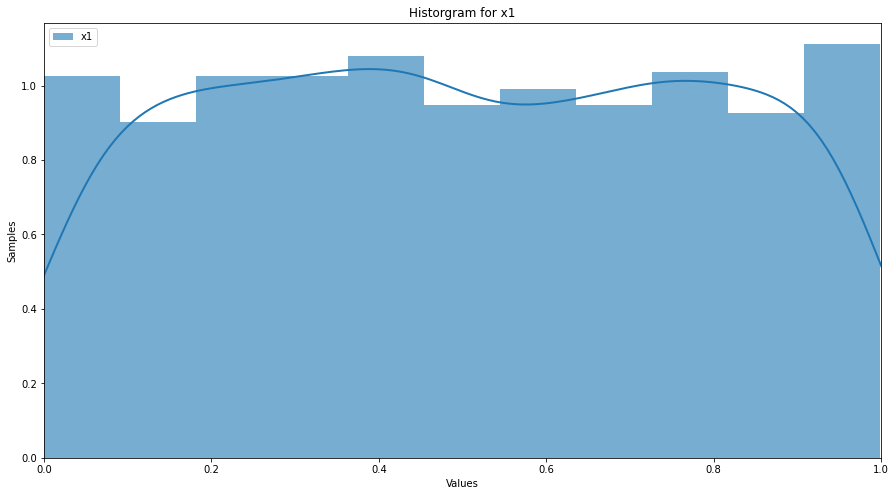

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


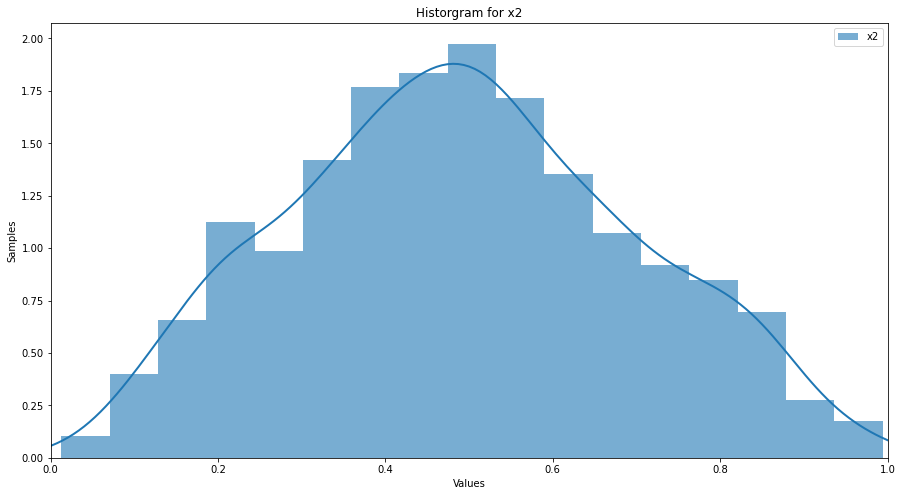

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


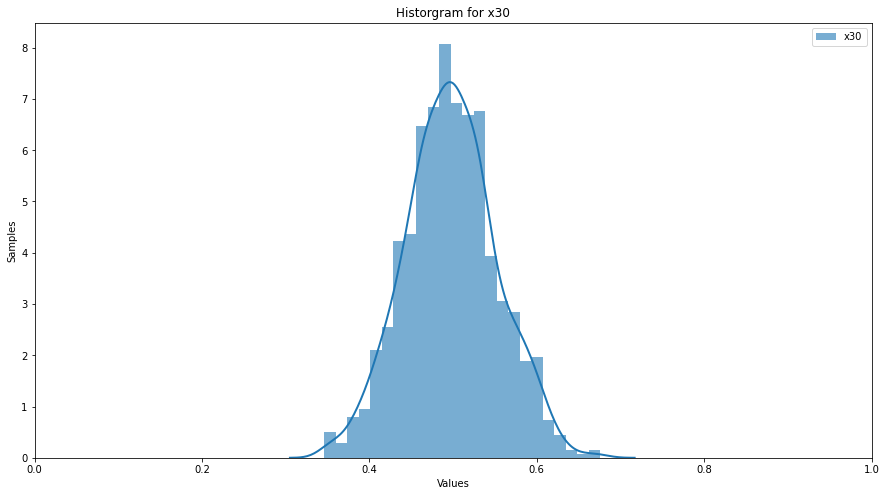

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


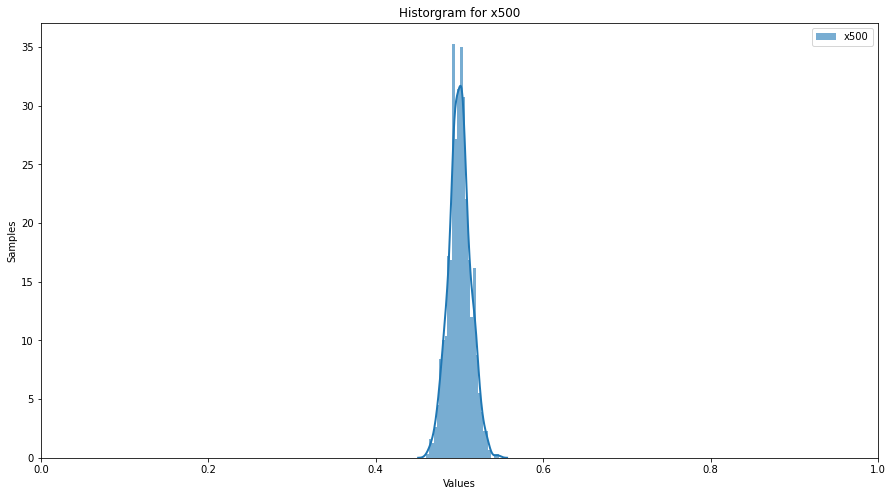

In [14]:
import seaborn as sns
kwargs = dict(hist_kws={'alpha': .6}, kde_kws={'linewidth': 2})

for key, value in x_s.items():
    plt.figure(figsize=(15, 8))
    sns.distplot(value, **kwargs, label=key)
    plt.xlim([0, 1])
    plt.title(f"Historgram for {key}")
    plt.xlabel('Values')
    plt.ylabel('Samples')
    plt.legend()
    plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

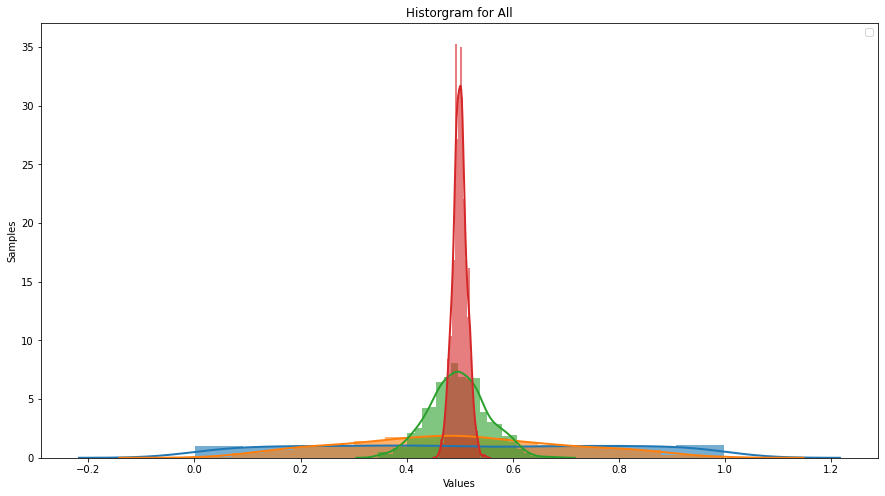

In [15]:
plt.figure(figsize=(15, 8))
for key, value in x_s.items():
    sns.distplot(value, **kwargs)
plt.title("Historgram for All")
plt.xlabel('Values')
plt.ylabel('Samples')
plt.legend()
plt.show()


#### What happens to the mean and variability of the sample means as n increases? Relate your observations to the Central Limit Theorem discussed in the class.

- As n increases the mean and variability converge to a central point. In X_1, we can see high variability and as n increases we can see the variability decrease and the mean hovers around 0.5 at X_500. Thus as the sample size increases the distributation closely resembles a normal distribution and becomes tightly clustered around the mean, which is a behaviour that agrees with the Central Limit Theorem.

In [16]:
%%shell
jupyter nbconvert --to html /content/HW1.ipynb

[NbConvertApp] WARNING | pattern '/content/HW1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  

CalledProcessError: ignored